# Problem 3

## Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Loading xlsx Into Pandas

In [43]:
df = pd.read_excel(r'GooglePlaystore.xlsx')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,"1,000+",Free,0.0,Everyone,Medical,2017-01-20 00:00:00,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


## Preprocessing

1. [3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

In [44]:
df = df.drop((df.loc[df['Reviews']=='3.0M'].index)[0])
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,"1,000+",Free,0.0,Everyone,Medical,2017-01-20 00:00:00,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


2. [4 pts] Remove rows where any of the columns has the value "Varies with device".

In [45]:
dict1 = dict((df.iloc[:,0:] == 'Varies with device').any(axis=1))

for x,y in dict1.items():
    if y == np.True_:
        df.drop(x, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,"50,000+",Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0.0,9.6M,10+,Free,0.0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.1 and up


3. [5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6". If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".

In [46]:
def isNaN(string):
    return string != string

def clean_andriod_version(value):
    if not isNaN(value):
        decimals = [item for item in value.split(' ') if '.' in item][0]

        return float(re.findall(r'\d+(?:\.\d+)?', decimals)[0])
    else:
        return value


df['Android Ver'] = df['Android Ver'].apply(clean_andriod_version)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,"50,000+",Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0.0,9.6M,10+,Free,0.0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.1


4. [5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [49]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')

def clean_ver(value):

    try:
        value = int(value)
    except:
        value = np.nan
    
    return value

df['Installs'] = df['Installs'].apply(clean_ver).dropna(axis = 0, how = 'any')

df

C:\Users\abroh\AppData\Local\Temp/ipykernel_47116/552389634.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,50000,Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.0
10835,FR Forms,BUSINESS,NaN,0.0,9.6M,10,Free,0.0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,5000,Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.0


5. [5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [50]:
df.drop((df.loc[(df['Reviews']<100) & (df['Installs']<50000) & (df['Rating'].isna())].index)[0],inplace=True)
df['Rating']=df['Rating'].fillna(round(df.groupby('Category')['Rating'].transform('mean'),2))

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.0,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.90,967.0,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510.0,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967.0,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.0
5,Paper flowers instructions,ART_AND_DESIGN,4.40,167.0,5.6M,50000,Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.00,7.0,2.6M,500,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.0
10835,FR Forms,BUSINESS,4.12,0.0,9.6M,10,Free,0.0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.50,38.0,53M,5000,Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4.0,3.6M,100,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.0


6. [6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.
Analysis (19 pts)

In [51]:
def clean_size(value):
    if not isinstance(value, float):
        if value[-1].lower() == 'm':
            value = float(value[0:-1]) * 1000000
        elif value[-1].lower() == 'k':
            value = float(value[0:-1]) * 1000
            
    return int(value)

df['Size'] = df['Size'].apply(clean_size)

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.0,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.90,967.0,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510.0,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967.0,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.0
5,Paper flowers instructions,ART_AND_DESIGN,4.40,167.0,5600000,50000,Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.00,7.0,2600000,500,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.0
10835,FR Forms,BUSINESS,4.12,0.0,9600000,10,Free,0.0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.50,38.0,53000000,5000,Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4.0,3600000,100,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.0


## Analysis

1. [4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [9]:
df.groupby('Category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,58.0,4.358621,0.368513,3.2,4.100,4.40,4.700,5.0
AUTO_AND_VEHICLES,62.0,4.146774,0.569935,2.1,3.900,4.25,4.500,4.9
BEAUTY,37.0,4.291892,0.370719,3.1,4.000,4.30,4.600,4.9
BOOKS_AND_REFERENCE,144.0,4.320139,0.457812,2.7,4.100,4.40,4.625,5.0
BUSINESS,245.0,4.119184,0.663942,1.0,3.800,4.30,4.500,5.0
COMICS,48.0,4.154167,0.556187,2.8,3.775,4.40,4.600,5.0
COMMUNICATION,209.0,4.100957,0.503831,1.0,3.900,4.20,4.400,5.0
DATING,173.0,3.957803,0.666132,1.0,3.600,4.10,4.400,5.0
EDUCATION,109.0,4.392661,0.255570,3.5,4.300,4.40,4.600,4.9


2. [11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:
a. Rating (gives top 3 most highly rated applications in each category)
b. Installs (gives top 3 most installed applications in each category)
c. Reviews (gives top 3 most reviewed applications in each category)

You don't need to do anything explicit to break ties.

Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for a.), Installs (for b.), and Reviews (for c.) as the third column.

In [52]:
df1 = df.loc[df['Type'] == 'Free']

def top3App(df, colName):

    df1 = df.sort_values(by=[colName], axis=0, ascending=False)
    index_list = list(df1.groupby('Category')[colName].head(3).index)

    cat_list = []
    app_list = []
    num_list = []

    for item in index_list:
        cat_list.append(df['Category'][item])
        app_list.append(df['App'][item])
        num_list.append(df[colName][item])

    final_df = pd.DataFrame(list(zip(cat_list, app_list, num_list)), columns=['Category', 'App', colName])
    final_df = final_df.sort_values(by = ['Category'], axis=0, ascending=True)

    return final_df

rating_df = top3App(df1,'Rating')
installs_df = top3App(df1,'Installs')
reviews_df = top3App(df1,'Reviews')

3. [4 pts] Find the average, maximum and minimum price of the paid applications.

In [53]:
filter = df.loc[df['Type']=='Paid']

max_price = filter['Price'].max()
min_price = filter['Price'].min()
avg_price = filter['Price'].mean()

## Visualization

1. [9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].
Count the number of applications per genre and display it using a pie chart.
Hint: Read about DataFrame.explode()

<AxesSubplot:ylabel='Genres'>

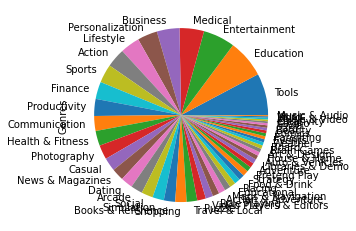

In [54]:
df['Genres'] = df['Genres'].str.split(';')
df = df.explode('Genres')
(df['Genres'].value_counts()).plot(kind='pie')

2. [7 pts] Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

<AxesSubplot:title={'center':'Rating'}, xlabel='Category'>

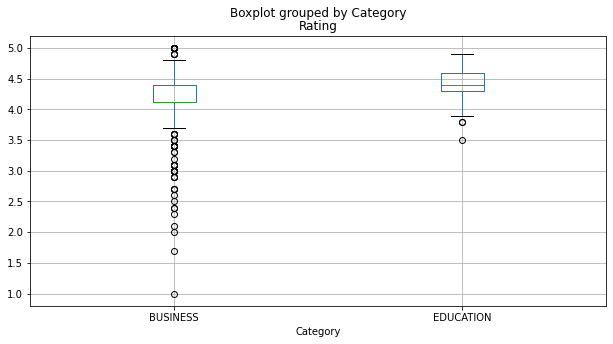

In [55]:
filter = df.loc[(df['Category'] == 'BUSINESS')|(df['Category'] == 'EDUCATION')]
filter.boxplot(column = 'Rating', by = 'Category', fontsize = 'medium', rot = 0, grid = True, figsize = (10,5))